# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:
# Set the API base URL and API key
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key  # Replace this with your actual OpenWeatherMap API key
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"  # Build the complete URL for the city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out required data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...{e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | labytnangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | sarnia
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | galveston
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | mossel bay
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | marsh harbour
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | port mathur

In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df["City"].count()
print(f"Record Count: {record_count}")


Record Count: 560


In [71]:
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,29.40,66,34,5.07,BR,1693062700
1,labytnangi,66.6572,66.4183,6.43,83,96,4.27,RU,1693062701
2,port-aux-francais,-49.3500,70.2167,3.74,76,67,7.11,TF,1693062702
3,grytviken,-54.2811,-36.5092,-4.59,72,21,9.86,GS,1693062703
4,puerto natales,-51.7236,-72.4875,3.31,68,100,2.00,CL,1693062704


In [76]:
import os

# Create the output_data directory if it doesn't exist
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a CSV
city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")


In [77]:
# Export the City_Data into a CSV
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [78]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,29.40,66,34,5.07,BR,1693062700
1,labytnangi,66.6572,66.4183,6.43,83,96,4.27,RU,1693062701
2,port-aux-francais,-49.3500,70.2167,3.74,76,67,7.11,TF,1693062702
3,grytviken,-54.2811,-36.5092,-4.59,72,21,9.86,GS,1693062703
4,puerto natales,-51.7236,-72.4875,3.31,68,100,2.00,CL,1693062704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

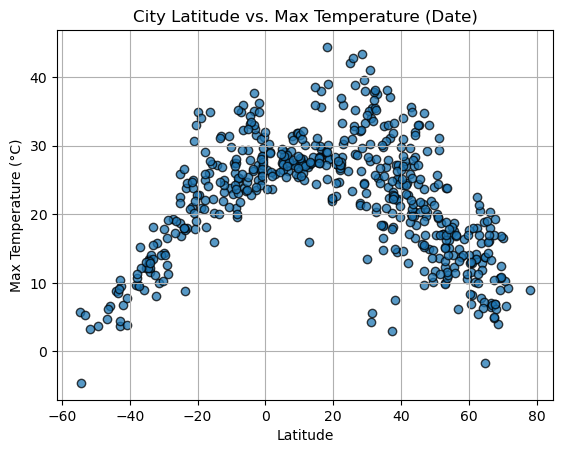

In [80]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

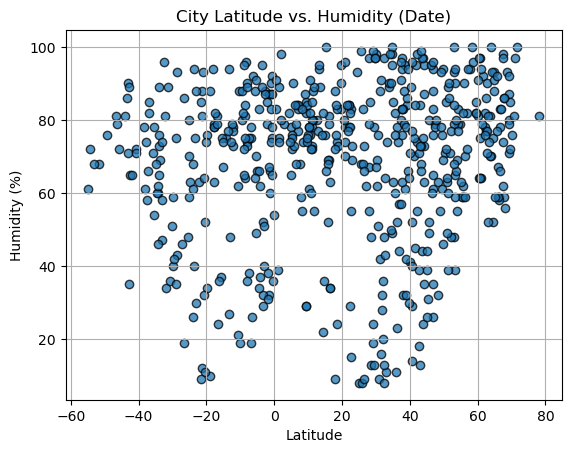

In [82]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

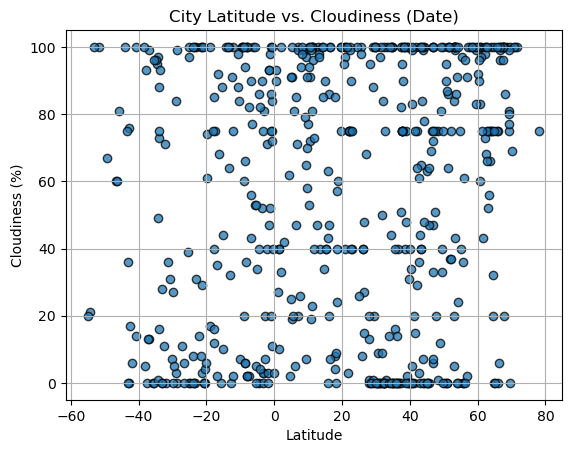

In [83]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

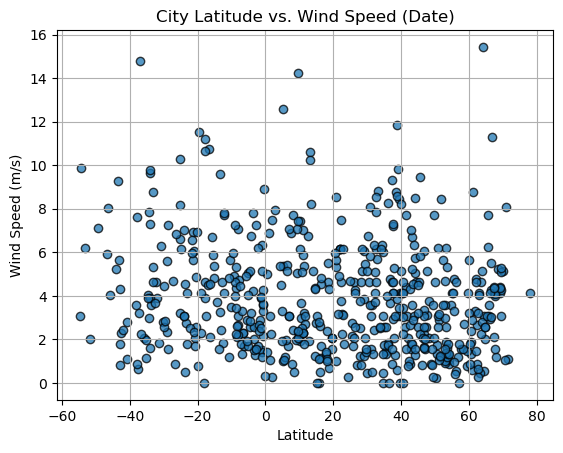

In [110]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


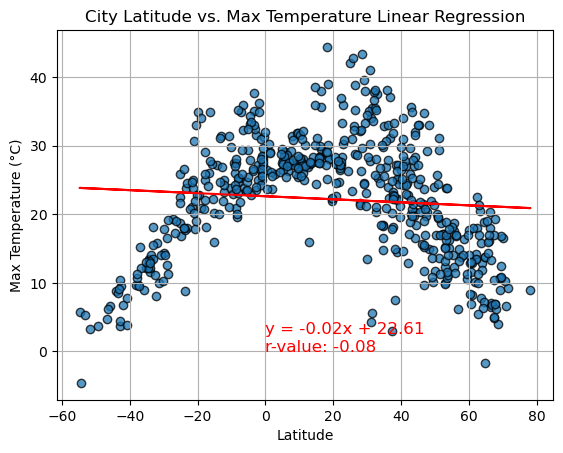

In [136]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_value_text = f"r-value: {r_value:.2f}"  # Include r-value in the annotation
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regression_line, color="red")
    
    # Annotate the equation and r-value together
    combined_text = f"{equation}\n{r_value_text}"
    plt.annotate(combined_text, coordinates, fontsize=12, color="red")
    
    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Example usage
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (°C)",
                       "City Latitude vs. Max Temperature Linear Regression", (0, 0))


In [137]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,labytnangi,66.6572,66.4183,6.43,83,96,4.27,RU,1693062701
5,sarnia,42.9787,-82.4041,20.07,84,100,1.54,CA,1693062652
7,thompson,55.7435,-97.8558,17.59,62,0,4.79,CA,1693062706
8,vernon,50.2581,-119.2691,16.91,71,0,0.24,CA,1693062707
9,st. john's,47.5649,-52.7093,20.38,79,51,3.13,CA,1693062707


In [138]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,29.40,66,34,5.07,BR,1693062700
2,port-aux-francais,-49.3500,70.2167,3.74,76,67,7.11,TF,1693062702
3,grytviken,-54.2811,-36.5092,-4.59,72,21,9.86,GS,1693062703
4,puerto natales,-51.7236,-72.4875,3.31,68,100,2.00,CL,1693062704
6,kruisfontein,-34.0033,24.7314,11.60,73,73,9.63,ZA,1693062705


###  Temperature vs. Latitude Linear Regression Plot

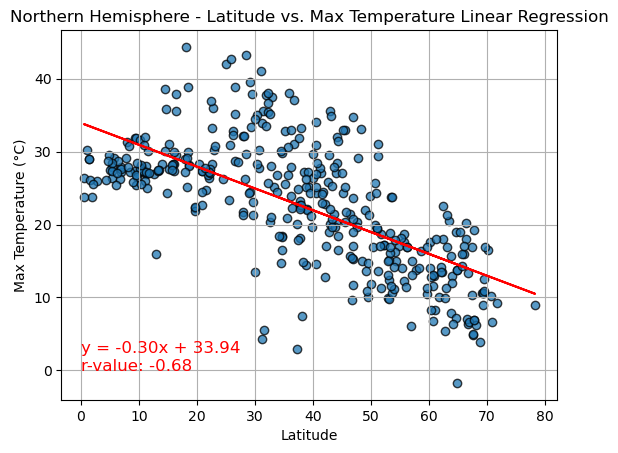

In [143]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Northern Hemisphere (Latitude >= 0)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (°C)",
                       "Northern Hemisphere - Latitude vs. Max Temperature Linear Regression", (0, 0))


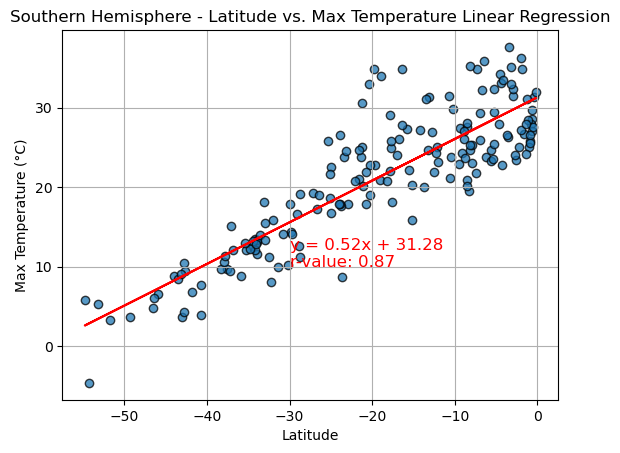

In [144]:
# Linear regression on Southern Hemisphere
# Perform linear regression on Southern Hemisphere (Latitude < 0)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude", "Max Temperature (°C)",
                       "Southern Hemisphere - Latitude vs. Max Temperature Linear Regression", (-30, 10))


**Discussion about the linear relationship:** Northern latitude are strongly correlated with changes in maximum temperature in the Northern Hemisphere compare to Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

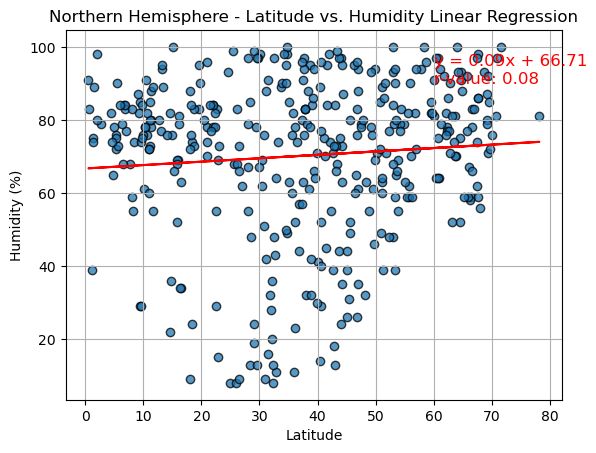

In [167]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere (Latitude >= 0) for Humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude", "Humidity (%)",
                       "Northern Hemisphere - Latitude vs. Humidity Linear Regression", (60, 90))


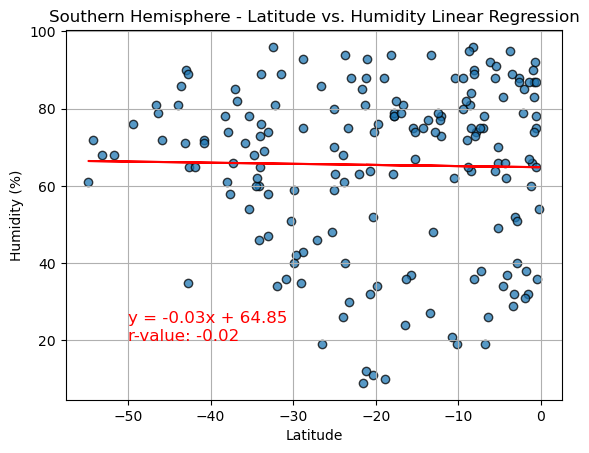

In [169]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere (Latitude < 0) for Humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Latitude", "Humidity (%)",
                       "Southern Hemisphere - Latitude vs. Humidity Linear Regression", (-50, 20))


**Discussion about the linear relationship:** Both latitude has strong relationship with humidity

### Cloudiness vs. Latitude Linear Regression Plot

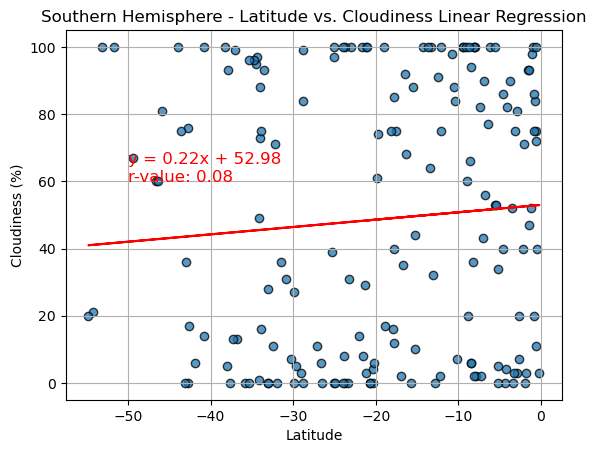

In [150]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere (Latitude < 0) for Cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)",
                       "Southern Hemisphere - Latitude vs. Cloudiness Linear Regression", (-50, 60))

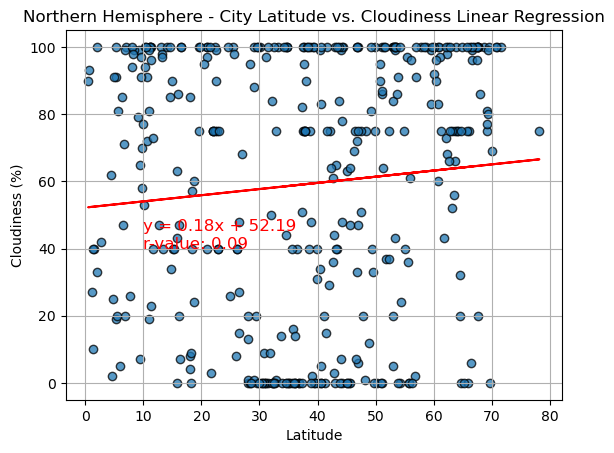

In [151]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere (Latitude >= 0) for Cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)",
                       "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression", (10, 40))


**Discussion about the linear relationship:** Both Latitute had strong relationship with cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

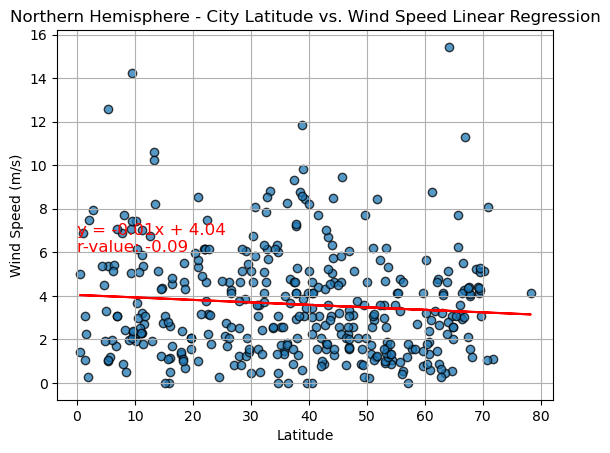

In [154]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere (Latitude >= 0) for Wind Speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)",
                       "Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression", (0, 6))


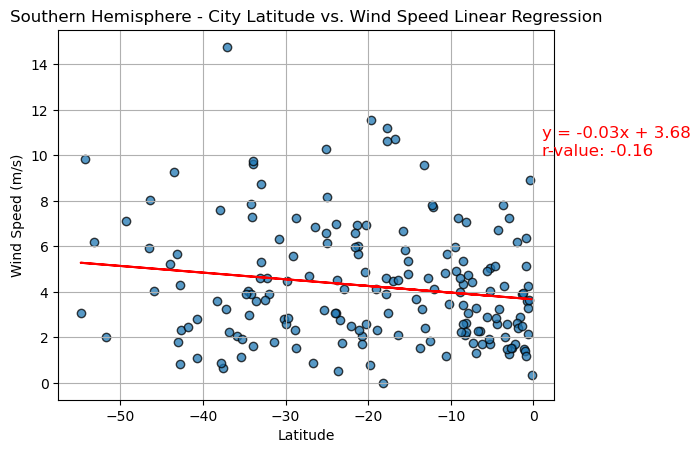

In [155]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed (m/s)",
                       "Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression", (1, 10))


**Discussion about the linear relationship:** similar both have strong relationship with Wind speed.